# Fetal Sağlık Tahmini

Normal gebelik 9 ay sürer. Her üç aylık döneme trimester denir. Bu 9 ay (3 trimester) boyunca fetüs büyür ve doğum için hazırlanır. Ancak çeşitli nedenlerle fetüsün büyümesi durur veya bozulur. Bu çeşitli nedenler yenidoğanın sakatlığına veya ölümüne neden olabilir.

Fetal sağlığın ana değerlendirme yöntemlerinden biri, annenin fetal kalp atışlarını ve uterus kasılmalarını değerlendiren kardiyotokagrafidir (CTG). CTG izleme, hipoksi (oksijen eksikliği) riski taşıyan bebekleri belirleyerek fetal sağlığı değerlendirmek için yaygın olarak kullanılır. CTG esas olarak doğum sırasında kullanılır.

Bu çalışmada, verilen CTG değerleriyle bir fetüsün normal, şüpheli veya sorunlu olup olmadığını tahmin etmek için bir model oluşturmaya çalışacağız.

In [77]:
## gerekli kütüphanelerin tanımlanması
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import MinMaxScaler


sns.set()
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import os


from sklearn.metrics import accuracy_score

#ML algoritms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
import xgboost as xgb



#Performance metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [19]:
## datanın okunup import edilmesi
data = pd.read_csv("fetal_health.csv")

# Veriler Hakkında Bilgi

Bu veri seti, Kardiyotokogram muayenelerinden çıkarılan ve daha sonra uzman doğum uzmanı tarafından 3 sınıfa sınıflandırılan 2126 özellik kaydını içerir:

    Normal
    Şüpheli
    Patolojik
 
Özellikler:

Data 21 özelliğe sahiptir. Her özellik, CTG taramalarından toplanır. 
Veri özellikleri hakkında daha fazla bilgi https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6822315/

Çıkışlar:

'fetal_health' 1 (Normal), 2 (Şüpheli) ve 3 (Patolojik) olarak etiketlendi

In [83]:
## data kontrolü için datanın ilk beş satırının çekilmesi
data.head().T

,0,1,2,3,4
baseline value,120.0,132.000,133.000,134.000,132.000
accelerations,0.0,0.006,0.003,0.003,0.007
fetal_movement,0.0,0.000,0.000,0.000,0.000
uterine_contractions,0.0,0.006,0.008,0.008,0.008
light_decelerations,0.0,0.003,0.003,0.003,0.000
severe_decelerations,0.0,0.000,0.000,0.000,0.000
prolongued_decelerations,0.0,0.000,0.000,0.000,0.000
abnormal_short_term_variability,73.0,17.000,16.000,16.000,16.000
mean_value_of_short_term_variability,0.5,2.100,2.100,2.400,2.400
percentage_of_time_with_abnormal_long_term_variability,43.0,0.000,0.000,0.000,0.000


In [21]:
## datadaki her bir kolonun tipinin tespit edilmesi
data.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [24]:
## datanın tanımlanması
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


### Gözlemler:


Veriler 2126 satır ve 21 sütundan oluşmaktadır. 
Eksik veri yok. Histogramlar hakkında bilgi içeren sütunlar biraz sorunlu görünüyor;

min, %25 ve %50 arasındaki mesafe çok yakın değil. Normal olmayan dağılımlar mevcut.

# Hedef Değişken : Fetal_Health


Önce hedef değişkeni inceleyelim. Nasıl dağıtılır, herhangi bir sınıf dengesizliği var mı? Bunları görmenin en iyi yolu, grafiğe dökmektir.

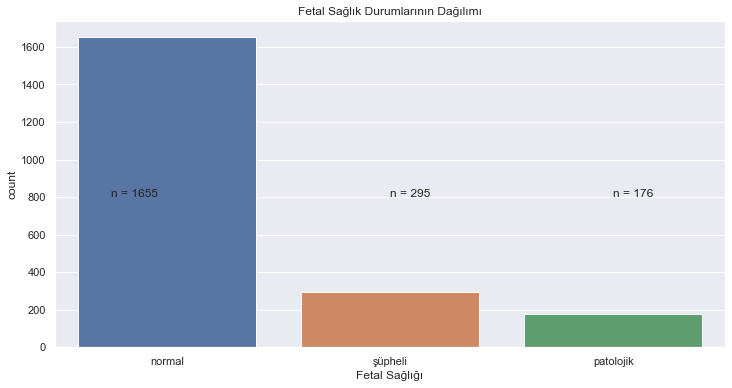

In [31]:

# Plot fetal health with box plots, and present actual counts on each box. 

labels = ['normal',
         'şüpheli',
         'patolojik']
fig, ax = plt.subplots(figsize=(12,6))
_ = sns.countplot(data.fetal_health)
_ = ax.set_xlabel('Fetal Sağlığı')
_ = ax.set_xticklabels(labels)
_ = plt.title('Fetal Sağlık Durumlarının Dağılımı')
_ = plt.text(s = f"n = {data.fetal_health.value_counts()[1]}", x = -0.25, y = 800)
_ = plt.text(s = f"n = {data.fetal_health.value_counts()[2]}", x = 1, y = 800)
_ = plt.text(s = f"n = {data.fetal_health.value_counts()[3]}", x = 2, y = 800)

In [16]:
fetal_health_data = pd.read_csv ('fetal_health.csv')
print(len(fetal_health_data))


2126


Hedef değişkenin dağılımı gerçek dünya gibidir; tüm doğumlar sağlıksız veya yenidoğanın ölümüyle sonuçlanmaz. Worldbank verilerine göre 2019 yılında ölüm oranı 1000 doğumda 28.2. Yani böyle bir dağılım bekleyebiliriz.

## Görseller

Fetal sağlığı etkileyebilecek 20 özellik vardır. Hepsini incelemeden önce (her 20 tanesini histogramlarla çizmek aşırı çizim olabilir) Önce korelasyon matrisini inceleyelim.

<AxesSubplot:>

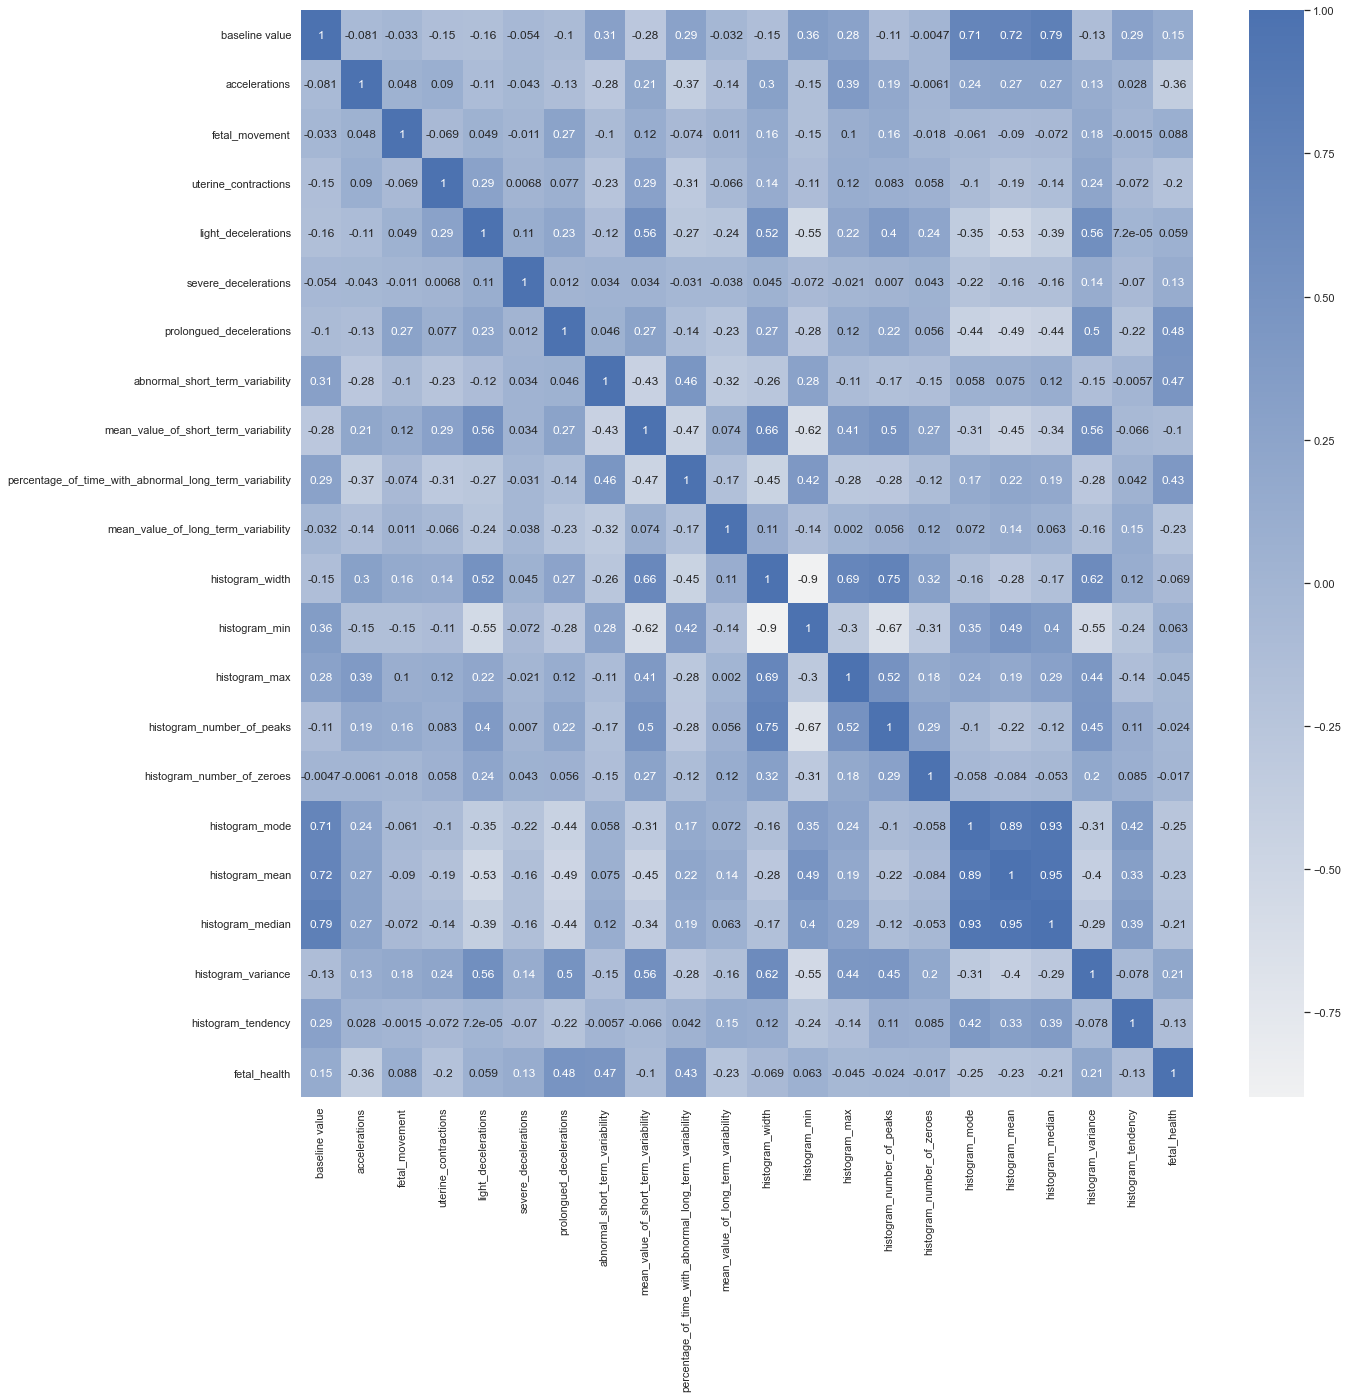

In [32]:
plt.figure(figsize=(20,20))
corr = data.corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

Korelasyon matrisine göre; hızlanmalar(accelerations), uzun süreli yavaşlamalar(prolonged decelerations), anormal kısa vadeli değişkenlik(abnormal short term variability), anormal uzun vadeli değişkenlik yüzdesi(percentage of abnormal long term variability), fetal sağlığı etkiler. Bunları araştırmak daha iyidir. Ayrıca histogram medyanı, mod ve ortalama arasında yüksek korelasyonlar vardır. Tahminim için bunlardan birini seçmem gerekiyor. Daha sonra özelliklerin VIF puanlarını araştıracağız.

# Hızlanmalar(Accelerations)

In [39]:
def getall_visuals(data,column,xlabel, bins = 50):
    """ This function plots histograms for 3 different fetal health classes
    and one for all data. 
    
    Column name should be str.
    """
    fig = plt.figure(figsize=(12, 10))

    plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

    sub1 = fig.add_subplot(2,3,1) # two rows, two columns, fist cell


    # Create second axes, the top-left plot with orange plot
    sub2 = fig.add_subplot(2,3,2) 

    #third ax, top right
    sub3 = fig.add_subplot(2,3,3) 

    # Create forth ax
    sub4 = fig.add_subplot(2,2,(3,4)) 

    sns.histplot(data[data['fetal_health']==1][column] , ax=sub1, color = 'g')
    sns.histplot(data[data['fetal_health']==2][column] , ax=sub2, color = 'r')
    sns.histplot(data[data['fetal_health']==3][column] , ax=sub3, color = 'y')
    
    sub1.set_xlabel('Normal için ' + xlabel)
    sub2.set_xlabel('Şüpheli için ' + xlabel)
    sub3.set_xlabel('Patolojik için ' + xlabel)
    sub4.set_xlabel('Hepsi için ' + xlabel)
    
    
    sns.histplot(data[column] , ax=sub4, bins=bins)

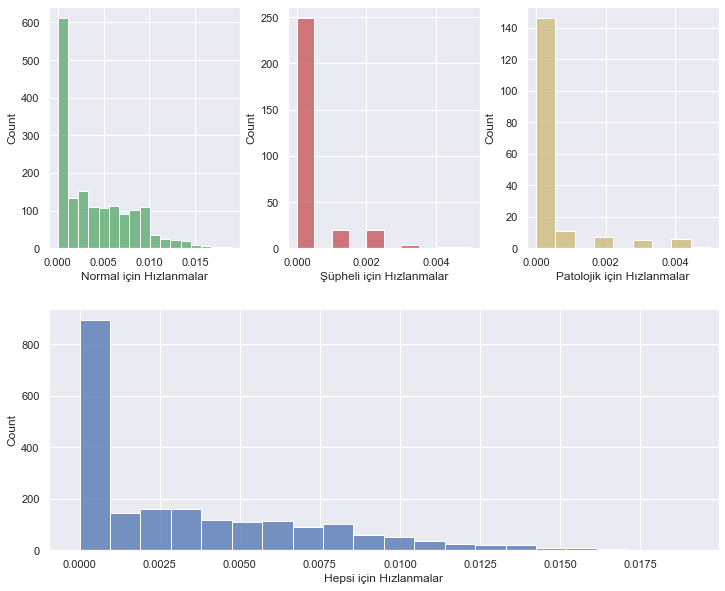

In [42]:
getall_visuals(data, 'accelerations', 'Hızlanmalar', 20 )

### Gözlem

Verilerin çoğu 0 civarında toplanmıştır. Ancak 0,005'in üzerindeki değerler sadece Normal kardiogramlardadır.

# Uzun Süreli Yavaşlamalar (Prolonged Decelerations)

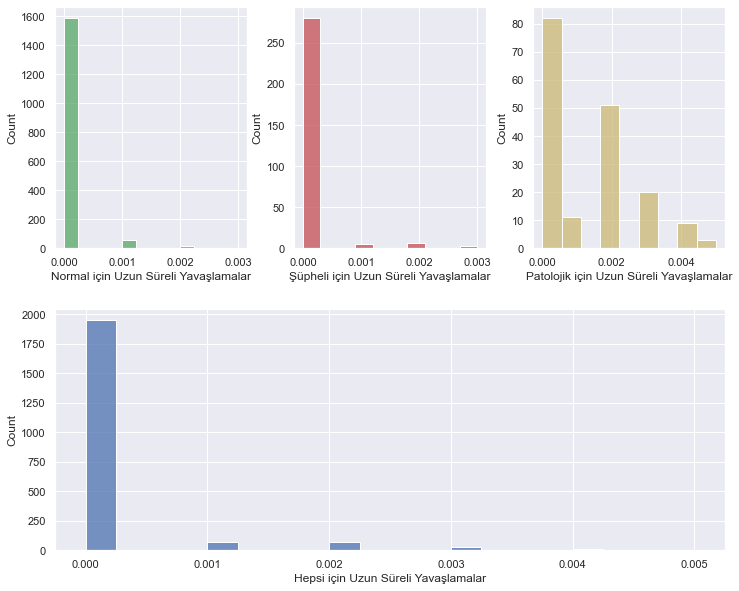

In [44]:
getall_visuals(data, 'prolongued_decelerations', 'Uzun Süreli Yavaşlamalar', 20 )

### Gözlem

Yine verilerin çoğu 0'da, ancak şüpheli ve patolojiklerde 0,001'ler ve daha yüksek miktarlar artıyor.

# Anormal Kısa Vadeli Değişkenlik(Abnormal Short Term Variability)

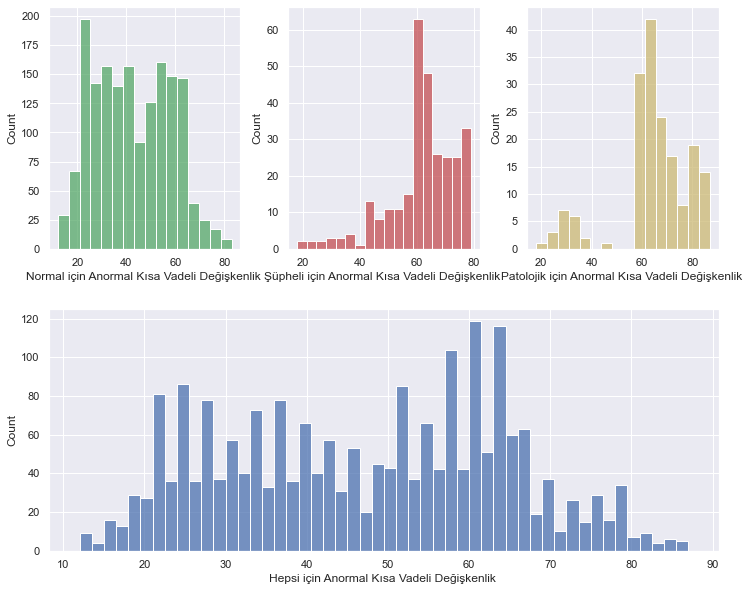

In [46]:
getall_visuals(data, 'abnormal_short_term_variability', 'Anormal Kısa Vadeli Değişkenlik \n', 50)

### Gözlem

Normal değerler 20-60 arasında toplanır; 60'ların üzerinde ise şüpheli ve patolojik değişkenlik miktarları toplanmıştır.

# Anormal Uzun Vadeli Değişkenlik Yüzdesi(Percentage of Abnormal Long Term Variability)

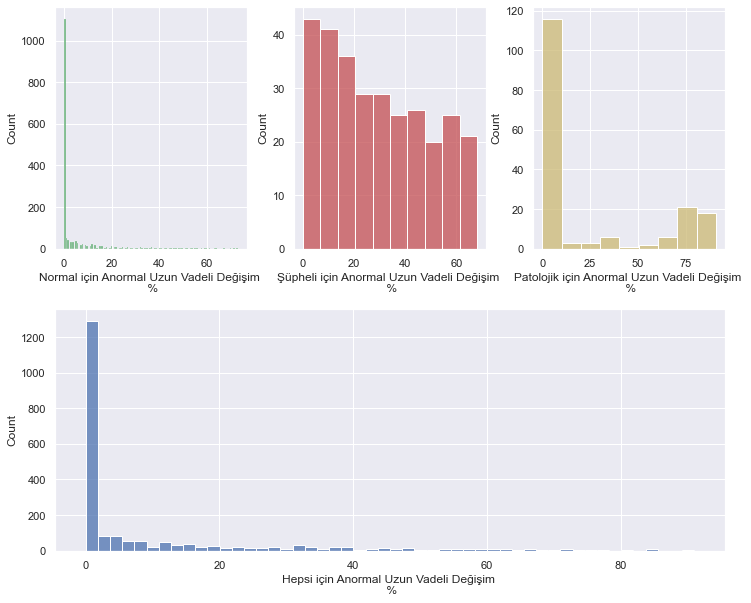

In [50]:
getall_visuals(data,'percentage_of_time_with_abnormal_long_term_variability', 'Anormal Uzun Vadeli Değişim \n %', 50)

### Gözlem

Normallerin çoğu 0'da toplanır. Şüpheli bebeklerin değerleri 0 ile 70 arasında toplanır, patolojik bebekler 0'da değilse 75'in üzerinde toplanır.

# Makine Öğrenmesi Modeli İnşası ve Uygulanması

In [51]:
# Visualize distributions of features
def bayesian_dist(column, data):
    """this function gets column name (str) and dataframe (str), 
    returns distribution plot of the column, skewness and kurtosis"""
    sns.distplot(data[column])
    plt.title(x)
    plt.show()
    plt.show()
    print('skewness: ', stats.skew(data[column]))
    print('kurtosis: ', stats.kurtosis(data[column]))
    

def normal_visual(column, df):
    """This function gets column and dataframe as str.
    Return 
    Shapiro Wilk test and Kolmogorov-Smirnov test results,
    distplot, skewness and kurtosis of the column
    """
    bayesian_dist(column, df)
    print('*'* 30)
    print(column, 'Shapiro-Wilk test t score: ', "{:.2f}".format(stats.shapiro(df[x])[0]))
    print(column, 'Shapiro-Wilk test p value: ', "{:.2f}".format(stats.shapiro(df[x])[1]))
    print('*'*30)
    print(column, 'Kolmogorov-Smirnov t score: ', "{:.2f}".format(stats.kstest(df[x],'norm', args=(df[x].mean(),
                                                                                                   df[x].std()))[0]))
    print(column, 'Kolmogorov-Smirnov t score: ', "{:.2f}".format(stats.kstest(df[x],'norm', args=(df[x].mean(),
                                                                                                   df[x].std()))[1]))

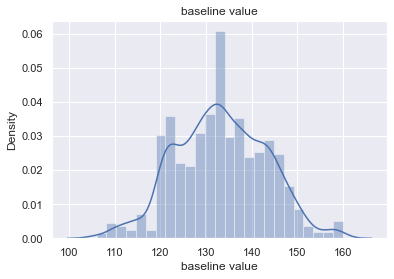

skewness:  0.020297854871183345
kurtosis:  -0.2950752858540011
******************************
baseline value Shapiro-Wilk test t score:  0.99
baseline value Shapiro-Wilk test p value:  0.00
******************************
baseline value Kolmogorov-Smirnov t score:  0.04
baseline value Kolmogorov-Smirnov t score:  0.00


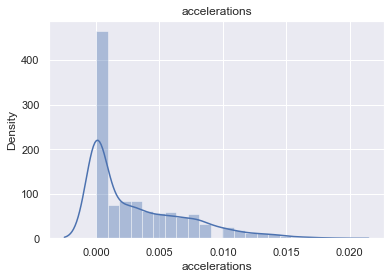

skewness:  1.203542153070066
kurtosis:  0.7630231927557718
******************************
accelerations Shapiro-Wilk test t score:  0.81
accelerations Shapiro-Wilk test p value:  0.00
******************************
accelerations Kolmogorov-Smirnov t score:  0.22
accelerations Kolmogorov-Smirnov t score:  0.00


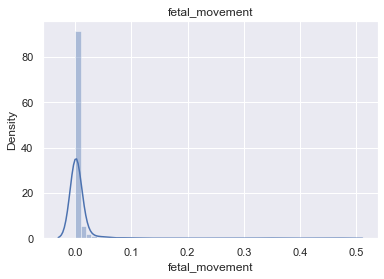

skewness:  7.805964765023443
kurtosis:  64.10696843281114
******************************
fetal_movement Shapiro-Wilk test t score:  0.19
fetal_movement Shapiro-Wilk test p value:  0.00
******************************
fetal_movement Kolmogorov-Smirnov t score:  0.42
fetal_movement Kolmogorov-Smirnov t score:  0.00


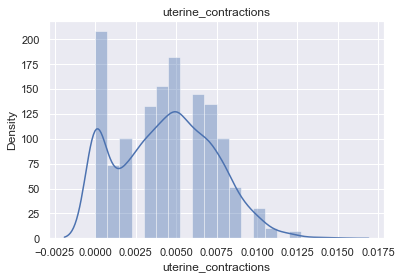

skewness:  0.1592021195935797
kurtosis:  -0.6363995037384913
******************************
uterine_contractions Shapiro-Wilk test t score:  0.96
uterine_contractions Shapiro-Wilk test p value:  0.00
******************************
uterine_contractions Kolmogorov-Smirnov t score:  0.09
uterine_contractions Kolmogorov-Smirnov t score:  0.00


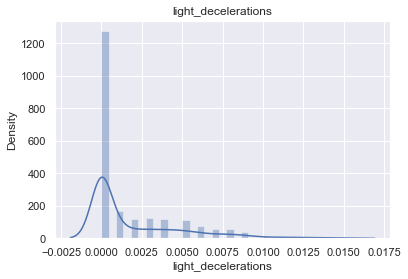

skewness:  1.7172241762866713
kurtosis:  2.5087232294878286
******************************
light_decelerations Shapiro-Wilk test t score:  0.70
light_decelerations Shapiro-Wilk test p value:  0.00
******************************
light_decelerations Kolmogorov-Smirnov t score:  0.32
light_decelerations Kolmogorov-Smirnov t score:  0.00


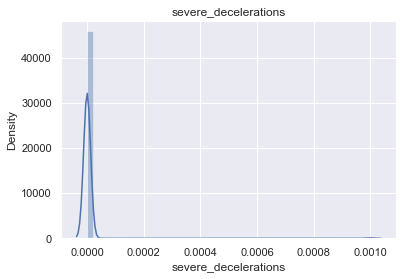

skewness:  17.341210717804756
kurtosis:  298.71758915930667
******************************
severe_decelerations Shapiro-Wilk test t score:  0.03
severe_decelerations Shapiro-Wilk test p value:  0.00
******************************
severe_decelerations Kolmogorov-Smirnov t score:  0.52
severe_decelerations Kolmogorov-Smirnov t score:  0.00


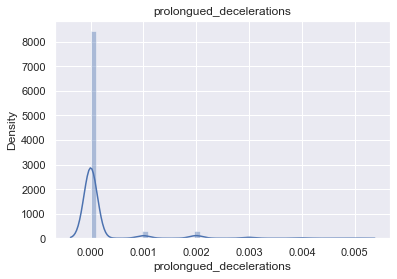

skewness:  4.320913737569469
kurtosis:  20.464878647562454
******************************
prolongued_decelerations Shapiro-Wilk test t score:  0.30
prolongued_decelerations Shapiro-Wilk test p value:  0.00
******************************
prolongued_decelerations Kolmogorov-Smirnov t score:  0.52
prolongued_decelerations Kolmogorov-Smirnov t score:  0.00


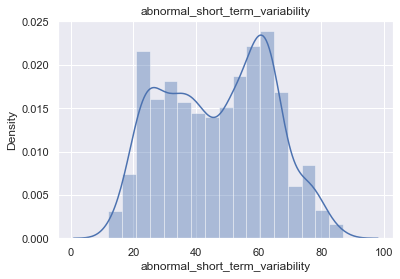

skewness:  -0.01182022892360217
kurtosis:  -1.0513802274785775
******************************
abnormal_short_term_variability Shapiro-Wilk test t score:  0.97
abnormal_short_term_variability Shapiro-Wilk test p value:  0.00
******************************
abnormal_short_term_variability Kolmogorov-Smirnov t score:  0.08
abnormal_short_term_variability Kolmogorov-Smirnov t score:  0.00


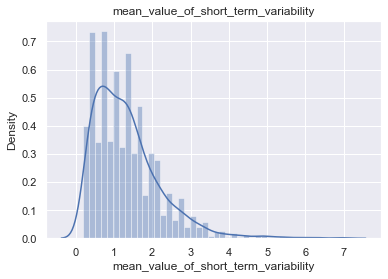

skewness:  1.6561696383216045
kurtosis:  4.686887344649029
******************************
mean_value_of_short_term_variability Shapiro-Wilk test t score:  0.88
mean_value_of_short_term_variability Shapiro-Wilk test p value:  0.00
******************************
mean_value_of_short_term_variability Kolmogorov-Smirnov t score:  0.11
mean_value_of_short_term_variability Kolmogorov-Smirnov t score:  0.00


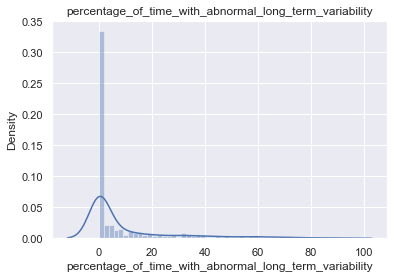

skewness:  2.19352626885173
kurtosis:  4.2401812160463725
******************************
percentage_of_time_with_abnormal_long_term_variability Shapiro-Wilk test t score:  0.61
percentage_of_time_with_abnormal_long_term_variability Shapiro-Wilk test p value:  0.00
******************************
percentage_of_time_with_abnormal_long_term_variability Kolmogorov-Smirnov t score:  0.30
percentage_of_time_with_abnormal_long_term_variability Kolmogorov-Smirnov t score:  0.00


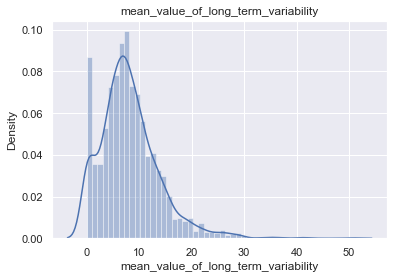

skewness:  1.3310579325954903
kurtosis:  4.118723344363613
******************************
mean_value_of_long_term_variability Shapiro-Wilk test t score:  0.92
mean_value_of_long_term_variability Shapiro-Wilk test p value:  0.00
******************************
mean_value_of_long_term_variability Kolmogorov-Smirnov t score:  0.08
mean_value_of_long_term_variability Kolmogorov-Smirnov t score:  0.00


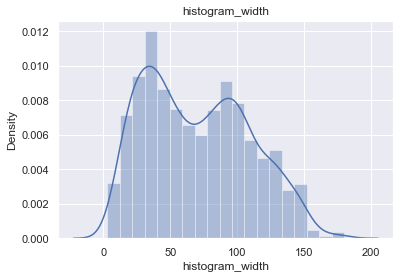

skewness:  0.3140130006787781
kurtosis:  -0.9029870215904912
******************************
histogram_width Shapiro-Wilk test t score:  0.96
histogram_width Shapiro-Wilk test p value:  0.00
******************************
histogram_width Kolmogorov-Smirnov t score:  0.09
histogram_width Kolmogorov-Smirnov t score:  0.00


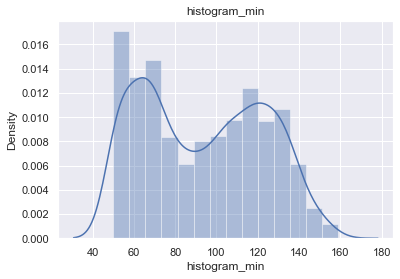

skewness:  0.11570231367169301
kurtosis:  -1.2902102107721183
******************************
histogram_min Shapiro-Wilk test t score:  0.94
histogram_min Shapiro-Wilk test p value:  0.00
******************************
histogram_min Kolmogorov-Smirnov t score:  0.11
histogram_min Kolmogorov-Smirnov t score:  0.00


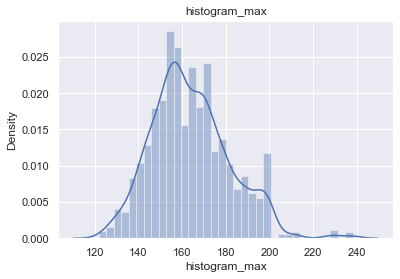

skewness:  0.5774546572229547
kurtosis:  0.6284614137962805
******************************
histogram_max Shapiro-Wilk test t score:  0.98
histogram_max Shapiro-Wilk test p value:  0.00
******************************
histogram_max Kolmogorov-Smirnov t score:  0.07
histogram_max Kolmogorov-Smirnov t score:  0.00


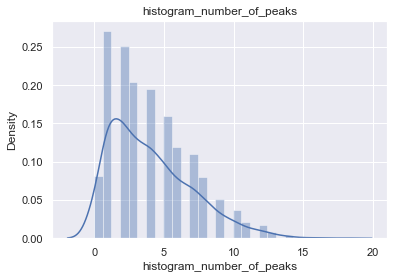

skewness:  0.892255814436207
kurtosis:  0.5002046126880981
******************************
histogram_number_of_peaks Shapiro-Wilk test t score:  0.93
histogram_number_of_peaks Shapiro-Wilk test p value:  0.00
******************************
histogram_number_of_peaks Kolmogorov-Smirnov t score:  0.14
histogram_number_of_peaks Kolmogorov-Smirnov t score:  0.00


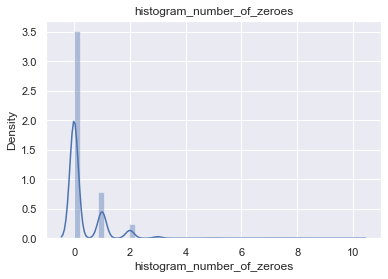

skewness:  3.91752086900489
kurtosis:  30.29089664975725
******************************
histogram_number_of_zeroes Shapiro-Wilk test t score:  0.50
histogram_number_of_zeroes Shapiro-Wilk test p value:  0.00
******************************
histogram_number_of_zeroes Kolmogorov-Smirnov t score:  0.44
histogram_number_of_zeroes Kolmogorov-Smirnov t score:  0.00


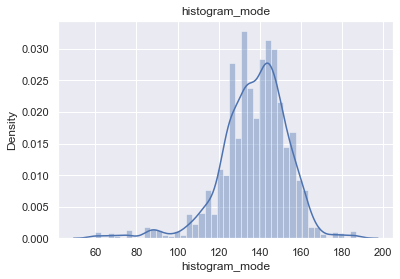

skewness:  -0.9944755592025584
kurtosis:  2.999636380197451
******************************
histogram_mode Shapiro-Wilk test t score:  0.95
histogram_mode Shapiro-Wilk test p value:  0.00
******************************
histogram_mode Kolmogorov-Smirnov t score:  0.08
histogram_mode Kolmogorov-Smirnov t score:  0.00


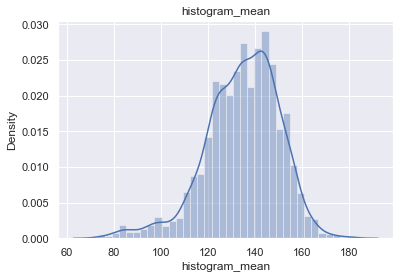

skewness:  -0.6505598243790086
kurtosis:  0.9284127911754778
******************************
histogram_mean Shapiro-Wilk test t score:  0.98
histogram_mean Shapiro-Wilk test p value:  0.00
******************************
histogram_mean Kolmogorov-Smirnov t score:  0.05
histogram_mean Kolmogorov-Smirnov t score:  0.00


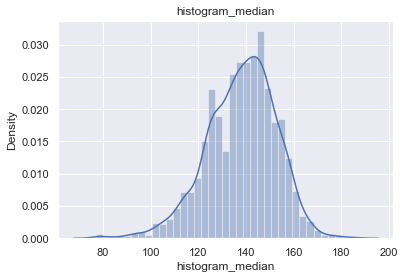

skewness:  -0.4780765865389985
kurtosis:  0.662870200582276
******************************
histogram_median Shapiro-Wilk test t score:  0.99
histogram_median Shapiro-Wilk test p value:  0.00
******************************
histogram_median Kolmogorov-Smirnov t score:  0.05
histogram_median Kolmogorov-Smirnov t score:  0.00


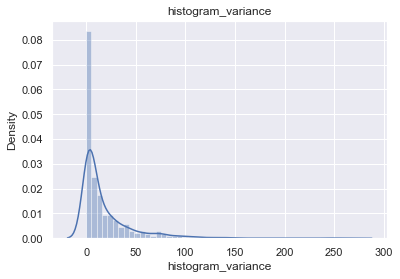

skewness:  3.2177015357863663
kurtosis:  15.093204821394817
******************************
histogram_variance Shapiro-Wilk test t score:  0.64
histogram_variance Shapiro-Wilk test p value:  0.00
******************************
histogram_variance Kolmogorov-Smirnov t score:  0.26
histogram_variance Kolmogorov-Smirnov t score:  0.00


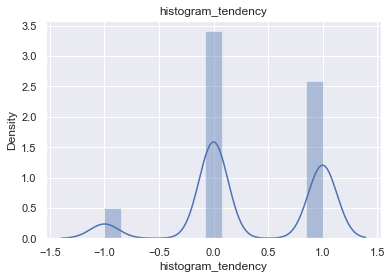

skewness:  -0.3114121871041956
kurtosis:  -0.6539257665681344
******************************
histogram_tendency Shapiro-Wilk test t score:  0.76
histogram_tendency Shapiro-Wilk test p value:  0.00
******************************
histogram_tendency Kolmogorov-Smirnov t score:  0.30
histogram_tendency Kolmogorov-Smirnov t score:  0.00


In [54]:
for x in data.columns:
    if x != 'fetal_health':
        normal_visual(x, data)

In [55]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [58]:
# Hiperparametre ayarı için optuna kullanmak için hedef değerleri 0,1,2 olarak değiştirmemiz gerekiyor. 
data['fetal_health'].replace({1:0,2:1,3:2}, inplace = True)

In [60]:
# test amacıyla, verilerin %10'unu ayırıyoruz
unseen_data = data.sample(n=210)
remaining_data = data.drop(unseen_data.index)
unseen_data.reset_index(inplace=True)
remaining_data.reset_index(inplace=True)

In [61]:
remaining_data.drop('index',axis=1, inplace=True)
unseen_data.drop('index',axis=1, inplace=True)

In [62]:
unseen_data['fetal_health'].value_counts()

0.0    199
1.0     11
Name: fetal_health, dtype: int64

In [63]:
remaining_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0
1,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0
2,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0
3,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,0.0
4,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,140.0,0.000,0.000,0.005,0.001,0.0,0.000,77.0,0.7,17.0,...,124.0,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0,0.0
1912,140.0,0.000,0.000,0.007,0.000,0.0,0.000,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,0.0
1913,140.0,0.001,0.000,0.007,0.000,0.0,0.000,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,0.0
1914,140.0,0.001,0.000,0.006,0.000,0.0,0.000,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,0.0


In [64]:
scaled_data = remaining_data.copy()
scaled_data.drop('fetal_health',axis=1,inplace=True)

scaled_data = ss.fit_transform(scaled_data)

In [66]:
scaled_data = pd.DataFrame(scaled_data , columns = data.drop('fetal_health',axis=1).columns)
scaled_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.350556,-0.821868,-0.199518,-1.475876,-0.639282,-0.060554,-0.272149,1.501031,-0.949206,1.819328,...,-0.164686,-1.072494,-2.124963,-0.701349,-0.458344,-1.061313,0.155586,-1.177263,1.872363,1.110795
1,-0.035788,-0.045772,-0.199518,1.242161,0.362789,-0.060554,-0.272149,-1.803688,0.873917,-0.529211,...,1.535634,-0.869263,1.895375,0.316927,0.933394,0.214660,0.028896,-0.006470,-0.201206,-0.528869
2,0.065348,-0.045772,-0.199518,1.242161,0.362789,-0.060554,-0.272149,-1.803688,1.215752,-0.529211,...,1.200723,-1.377339,0.331910,2.353478,-0.458344,-0.028382,-0.034450,-0.075340,-0.201206,1.110795
3,-0.136924,0.989024,-0.199518,1.242161,-0.639282,-0.060554,-0.272149,-1.803688,1.215752,-0.529211,...,1.200723,-1.377339,0.331910,1.674627,-0.458344,-0.028382,0.092241,-0.006470,-0.270325,1.110795
4,0.065348,-0.563170,-0.199518,1.921671,2.366931,-0.060554,3.113803,-1.223913,5.203834,-0.529211,...,2.050883,-1.478955,2.007051,0.316927,3.716871,-3.734779,-1.744775,-2.141446,5.224634,-0.528869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,0.672163,-0.821868,-0.199518,0.222898,-0.305259,-0.060554,-0.272149,1.732941,-0.721316,0.399281,...,-1.014846,1.027555,-0.505661,-0.701349,-0.458344,0.457702,0.535659,0.475621,-0.581361,-0.528869
1912,0.672163,-0.821868,-0.199518,0.902407,-0.639282,-0.060554,-0.272149,1.848896,-1.291042,0.836219,...,-0.782984,1.467888,0.722776,-0.022498,-0.458344,0.943787,0.979076,0.957712,-0.581361,-0.528869
1913,0.672163,-0.563170,-0.199518,0.902407,-0.639282,-0.060554,-0.272149,1.790918,-1.063151,0.672367,...,-0.113161,0.316248,0.276072,0.656352,-0.458344,0.883027,0.852386,0.888842,-0.546801,1.110795
1914,0.672163,-0.563170,-0.199518,0.562652,-0.639282,-0.060554,-0.272149,1.790918,-1.063151,0.945453,...,-0.113161,0.316248,0.276072,0.656352,-0.458344,0.883027,0.789040,0.888842,-0.512242,1.110795


### Test Ve Train İçin Ayrılması 

In [67]:
from sklearn.model_selection import train_test_split
target = remaining_data['fetal_health']
predictors = scaled_data.copy()
x_train, x_test, y_train, y_test = train_test_split(predictors,target, train_size=0.7,
                                                    random_state= 42, stratify = target.values)


display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

(1341, 21)

(1341,)

(575, 21)

(575,)

In [90]:
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {"LR": LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "DT" : DecisionTreeClassifier(),
          'RFC' : RandomForestClassifier(),
          'ABC' : AdaBoostClassifier(),
          'GBC' : GradientBoostingClassifier(),
          'DTC' : DecisionTreeClassifier(),
          'XGB' : XGBClassifier(early_stopping_rounds = 300)
          }


for test, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train, train_pred)
    print( test + ' scores')
    print(acc)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('*' * 100)
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)

LR scores
0.9721739130434782
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       525
         1.0       0.93      0.74      0.82        50

    accuracy                           0.97       575
   macro avg       0.95      0.87      0.90       575
weighted avg       0.97      0.97      0.97       575

[[522   3]
 [ 13  37]]
****************************************************************************************************
KNN scores
0.9669565217391304
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       525
         1.0       0.92      0.68      0.78        50

    accuracy                           0.97       575
   macro avg       0.94      0.84      0.88       575
weighted avg       0.97      0.97      0.96       575

[[522   3]
 [ 16  34]]
****************************************************************************************************
DT scores
0.9808695652173913
          

In [91]:
model_accuracy.sort_values(ascending=False, by = 'Accuracy')


,Model,Accuracy,Train_acc
3,RFC,0.987826,1.000000
4,ABC,0.986087,0.997763
6,DTC,0.984348,1.000000
7,XGB,0.984348,1.000000
5,GBC,0.982609,1.000000
2,DT,0.980870,1.000000
0,LR,0.972174,0.970172
1,KNN,0.966957,0.982103
